# Project - Text Classification

- We have news articles from various newspaper divided into 20 newsgroup , our main task is to build a naive bayes model which when given a new news article , would be able to classify it into one of the pre defined 20 newsgroup.
- Outline:
    - data collections and data cleaning
    - creating the vocabulary of words from all the training articles combined , which later used as features for our label data
    - creating a 2d document matrix (Document term matrix)
    - using the inbuild Sklearn's multinomial naive bayes
    - writing a custom naive bayes algorithm from scractch

### Dataset Preprocessing
    - imported newsgroup dataset from sklearn , the dataset is same as given in the coding ninja link
    - using stopwords from ntlk , to tokenize the words from articles using word_tokenize from nltk

In [39]:
# importing all important library
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [3]:
# downloading /loading the newsgroups dataset from sklearn
news = fetch_20newsgroups()
news_data = news.data
news_target = news.target
news_target_names = news.target_names

In [4]:
# tokenize all the X data by using word_tokenize from nltk
# tokenize function will do some extra preprocessing of the text like remove numericals and punctutation
def tokenize(text):
    exclist = string.punctuation + string.digits
    # remove punctuations and digits from oldtext
    table_ = str.maketrans('', '', exclist)
    newtext = ' '.join(text.translate(table_).split())
    
    result = word_tokenize(newtext)
    
    return result

tokens = [tokenize(item) for item in news_data]
print('Length of tokens: ',len(tokens))
print('tokens[0]: ',tokens[0])

Length of tokens:  11314
tokens[0]:  ['From', 'lerxstwamumdedu', 'wheres', 'my', 'thing', 'Subject', 'WHAT', 'car', 'is', 'this', 'NntpPostingHost', 'racwamumdedu', 'Organization', 'University', 'of', 'Maryland', 'College', 'Park', 'Lines', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', 'It', 'was', 'a', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 's', 'early', 's', 'It', 'was', 'called', 'a', 'Bricklin', 'The', 'doors', 'were', 'really', 'small', 'In', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'This', 'is', 'all', 'I', 'know', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'email', 'Thanks', 'IL', 'brought', 'to', '

In [5]:
# creating a list of stopwords to remove from tokens
stop_words = set(stopwords.words('english'))

# some extra stop words to add it to the list of stopwords
extra_stop_words = ["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

# some extra punctuations fro string library
punch = list(set(string.punctuation))
extra_stop_words.extend(punch)
stop_words.update(list(set(extra_stop_words)))

- in the below code i am creating word frequency dictionary from the tokens at the same time removing any punctuation and stopwords if present.
- creating a data frame (word_freq_df) from word_freq_list just to visualize the frequency counts w.r.t words

In [6]:
# creating Vocabulary , removing Unnecessary words (stop words) & punchuation
word_freq = {}
for doc in tokens:
    for w in doc:
        if w.lower() not in stop_words and len(w)>2:
            if w in word_freq.keys():
                word_freq[w]+=1
            else:
                word_freq[w]=1
word_freq_list = [[k,v] for k, v in sorted(word_freq.items(), key=lambda item: item[1],reverse=True)]
print('word_freq_list , length :',len(word_freq_list))

word_freq_list , length : 136943


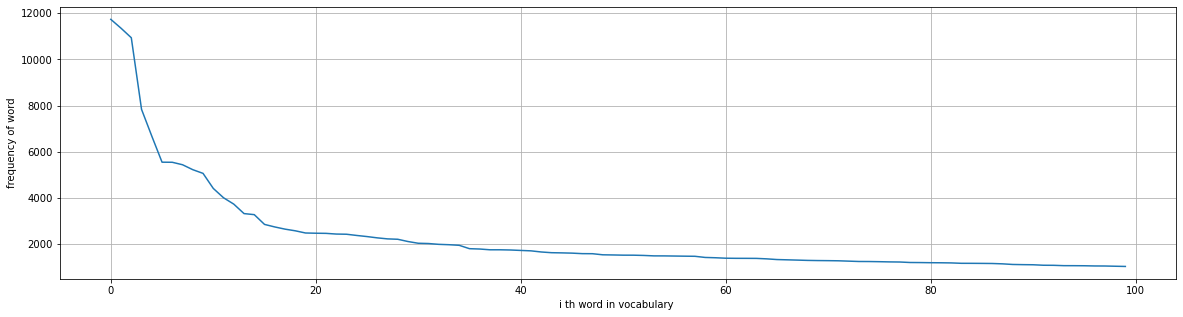

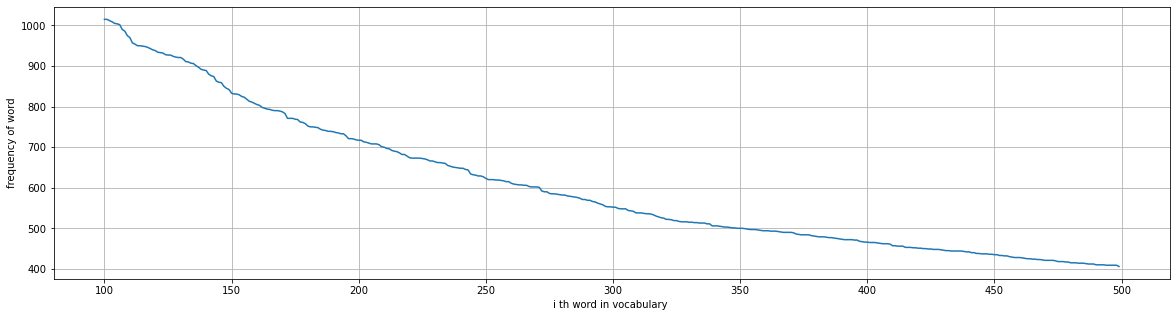

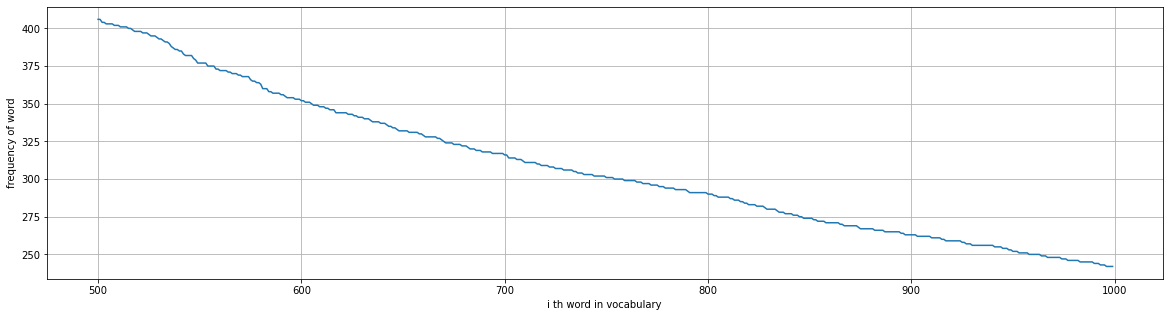

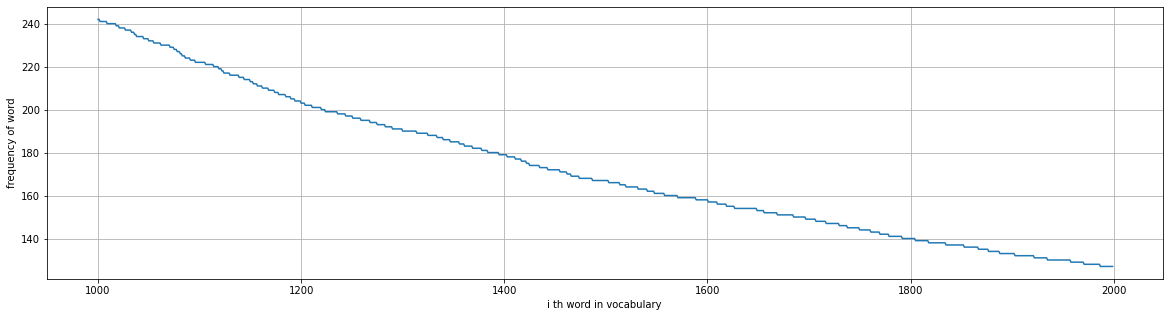

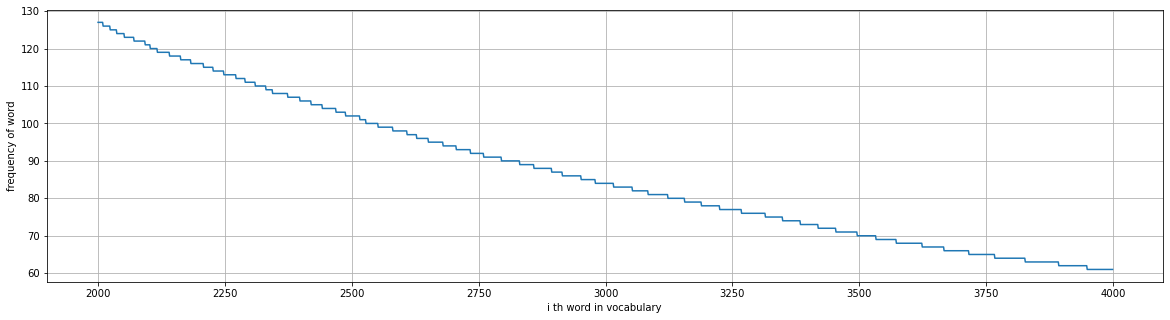

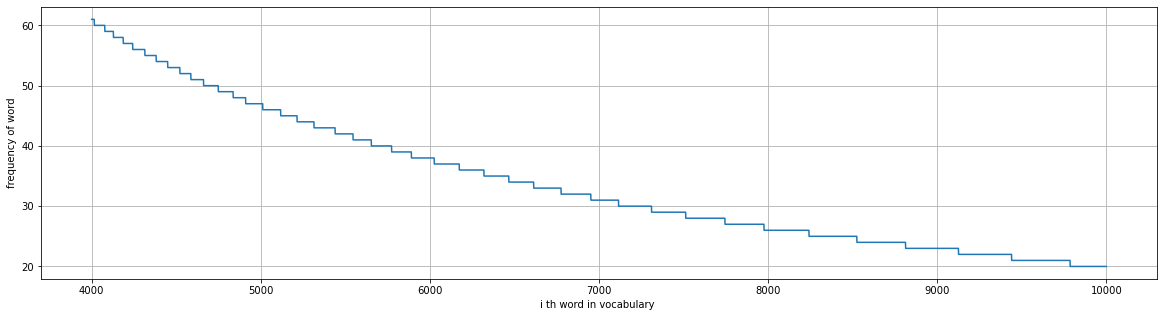

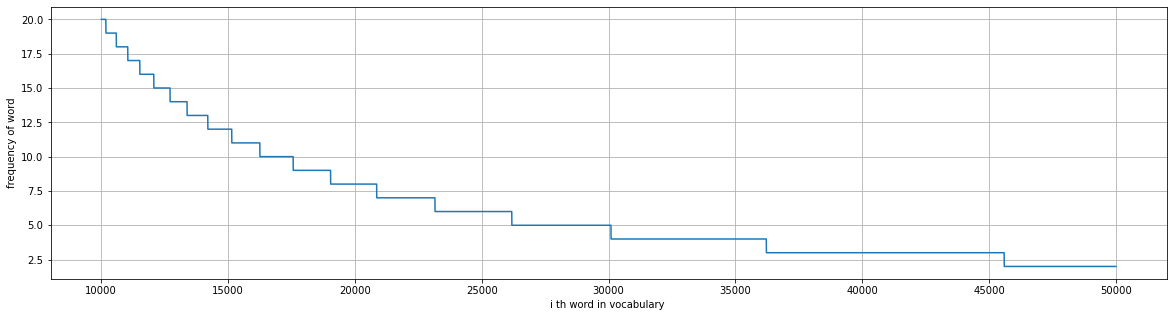

In [7]:
def plot_freq(start,end):
    x_temp = [i for i in range(start,end)]
    y_temp = [word_freq_list[i][1] for i in range(start,end)]
    
    plt.figure(figsize=(20,5))
    plt.plot(x_temp,y_temp)
    plt.xlabel('i th word in vocabulary ')
    plt.ylabel('frequency of word')
    plt.grid()
    plt.show()

ll = [0,100,500,1000,2000,4000,10000,50000]
for l in range(1,len(ll)):
    plot_freq(ll[l-1],ll[l])

- from above plot_freq function we can visualize that after 4000th word the frequency is in between (0-50) thats more then 80% of our Vocabulary 
    - so for now we will ignore those words from our vocabulary for further calculations 

In [8]:
final_word_list = [word_freq_list[i][0] for i in range(4000)]
print(final_word_list)

['Subject', 'Lines', 'Organization', 'writes', 'article', 'people', 'like', 'University', 'dont', 'know', 'think', 'use', 'time', 'MAXAXAXAXAXAXAXAXAXAXAXAXAXAXAX', 'good', 'way', 'make', 'say', 'Distribution', 'want', 'right', 'NntpPostingHost', 'new', 'said', 'used', 'NNTPPostingHost', 'work', 'need', 'God', 'problem', 'world', 'really', 'believe', 'going', 'years', 'Ive', 'using', 'year', 'point', 'ReplyTo', 'things', 'better', 'question', 'got', 'information', 'bit', 'help', 'number', 'Thanks', 'file', 'government', 'sure', 'read', 'program', 'thing', 'David', 'available', 'doesnt', 'New', 'little', 'drive', 'didnt', 'come', 'Computer', 'case', 'fact', 'email', 'John', 'course', 'version', 'long', 'different', 'probably', 'day', 'key', 'set', 'look', 'tell', 'best', 'lot', 'says', 'power', 'Jesus', 'far', 'car', 'possible', 'true', 'run', 'Windows', 'law', 'mean', 'list', 'try', 'called', 'USA', 'game', 'real', 'line', 'problems', 'files', 'great', 'card', 'reason', 'life', 'exampl

#### Creating a 2d document term matrix for numerical computation 
- In Below code , given the word frequency we will create the 2D vector array/df , which will be given as input to the naive bayes algorithm.
    - each row will represent a single article (training example).
    - each columns are the words / vocabulary  created above from all the articles.
        - feature values for that row will be no of occurrences of that words (from vocabulary ) present in that particular article/docs which is representing that row.

In [9]:
def create_final_dataset(all_docs_tokens,final_word_list,target,target_names):
    all_dict = {}
    for i in range(len(all_docs_tokens)):
        doc = all_docs_tokens[i]
        temp_dict = {f:0 for f in final_word_list}
        for f in final_word_list:
            if f in doc:
                temp_dict[f]+=1
        temp_dict['output'] = target_names[target[i]]
        all_dict[i]=temp_dict
        
    df = pd.DataFrame().from_dict(all_dict,orient="index") 
    return df

final_df = create_final_dataset(tokens,final_word_list,news_target,news_target_names)
print('Shape of final_Df : ',final_df.shape)
final_df.head(10)

Shape of final_Df :  (11314, 4000)


,Subject,Lines,Organization,writes,article,people,like,University,dont,know,...,wed,password,interpretations,saving,desired,presumably,labor,upset,CMOS,judges
0,1,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# final_df output columns /traget columsn
final_df['output'].tail()

11309                     sci.med
11310       comp.sys.mac.hardware
11311    comp.sys.ibm.pc.hardware
11312               comp.graphics
11313             rec.motorcycles
Name: output, dtype: object

In [11]:
# saving the term document matrix to a csv file for future references
final_df.to_csv('final_20newsgroups_dataset.csv',index=False)

### Reading the final saved csv file (document term matrix)

 -  as the input dataset in prepared , we will now feed it to 
     - sklean MultinomialNB
     - custom naive bayes written from scratch

In [12]:
# read the finalized document matrix
news_df = pd.read_csv('final_20newsgroups_dataset.csv')
y1 = news_df['output']
x1 = news_df.drop(['output'],axis=1)

# splitting the dataset to train and test datasets
x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state=1234)
print('Training size : ',x_train.shape,y_train.shape)
print('Testing size : ',x_test.shape,y_test.shape)

Training size :  (8485, 3999) (8485,)
Testing size :  (2829, 3999) (2829,)


### Using sklearn MultinomailNB from sklearn.naive_bayes

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

# Initiating the classfier instance
clf = MultinomialNB()
# fitting the classifier object to training data
clf.fit(x_train, y_train)
# testing the classifier and storing the predicted y_pred classes
y_pred = clf.predict(x_test)

# Generating the classification report and printing the confusion matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.80      0.83       127
           comp.graphics       0.71      0.74      0.72       148
 comp.os.ms-windows.misc       0.70      0.74      0.72       134
comp.sys.ibm.pc.hardware       0.65      0.73      0.69       136
   comp.sys.mac.hardware       0.78      0.76      0.77       156
          comp.windows.x       0.80      0.77      0.79       171
            misc.forsale       0.69      0.84      0.76       147
               rec.autos       0.77      0.82      0.79       137
         rec.motorcycles       0.85      0.86      0.85       150
      rec.sport.baseball       0.89      0.90      0.89       154
        rec.sport.hockey       0.95      0.93      0.94       168
               sci.crypt       0.97      0.90      0.93       143
         sci.electronics       0.80      0.72      0.75       144
                 sci.med       0.93      0.79      0.85       138
         

In [29]:
# storing the sklearn models results , to use it for comparison 
report_list = classification_report(y_test,y_pred).split("\n")
report_list = [i.split()[:-1] for i in report_list[1:-3] if i!=""][:-1]
sklearn_result_df = pd.DataFrame(report_list,columns=["target_name","precision","recall","f1_score"])
sklearn_result_df

,target_name,precision,recall,f1_score
0,alt.atheism,0.85,0.80,0.83
1,comp.graphics,0.71,0.74,0.72
2,comp.os.ms-windows.misc,0.70,0.74,0.72
3,comp.sys.ibm.pc.hardware,0.65,0.73,0.69
4,comp.sys.mac.hardware,0.78,0.76,0.77
5,comp.windows.x,0.80,0.77,0.79
6,misc.forsale,0.69,0.84,0.76
7,rec.autos,0.77,0.82,0.79
8,rec.motorcycles,0.85,0.86,0.85
9,rec.sport.baseball,0.89,0.90,0.89


### Using custom naive bayes algorithm written from scartch

-  using the nested dictionary approach to store the counts , so that while predicting we are directly refereing to that count values for calculating probability

- function fit
    - we create a global dictionary wose keys are all possible class and a total_count which contains total freq_count
    - each class has a own dictionary with keys all feature(words) and total count ( total freq count of words/features for that class)
       
-  using tqdm library to display a nice little fancy progress bar :-)

- fucntion probability :
    - it calculates the corresponding probability for the test example for a specific class given the main dictionary and test data
    - using logarithmic computation to avoid running into zero value , small values multiplied many times may converge result to zero
    
- function predictSinglePoint:
    - helper function to handle prediction for a new test data, it calls probability function and keeps track of best probability and thus best class for that test data.

- function predict :
    - takes the whole testing dataset and passes each row/test data to predictionSinglePoint for prediction
    - keeps an array storing the results for those test data and resturns that array
    

In [30]:
# fitting training data
def fit(X_train,Y_train):
    # main dict
    result = {}
    result["total_data"] = 0
    class_values = list(set(Y_train))
    
    # iterate over all possible class
    for i in tqdm(range(len(class_values))):
        current_class = class_values[i]
        result[current_class] = {}
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1]
        result[current_class]["total_count"] = 0
        for j in range(1,num_features+1):
            result[current_class][j] = X_train_current.iloc[:,j-1].sum()
            result[current_class]['total_count']+= result[current_class][j]
        result["total_data"] += result[current_class]["total_count"]
        
    return result

In [31]:
# finding probablity for a specific class
def probability(dictionary, x, current_class):
    
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    num_features = len(x)
    
    # iterate over all features/words -> find its count value from dictionary -> compute probability and add to main ans
    for j in range(num_features):
        xj = x[j]
        if x[j]==0:
            continue
        current_class_with_xj = dictionary[current_class][j+1] + 1
        current_class_total_count = dictionary[current_class]["total_count"] + num_features
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count)
        output += current_xj_prob
    
    return output

In [32]:
# prediction for a single data point
def predictSinglePoint(dictionary,x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class == "total_data"):
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class  

In [33]:
# predicting the classes
def predict(dictionary, X_test):
    Y_pred = []
    
    # iterate aver all datasets
    for idx,row in X_test.iterrows():
        x_class = predictSinglePoint(dictionary,row)
        Y_pred.append(x_class)
        
    return Y_pred

In [34]:
# calling fit function and storing the result dictionary for further use
result_dictionary = fit(x_train,y_train)

100%|██████████| 20/20 [00:06<00:00,  3.13it/s]


In [36]:
# calling the predict function stores the result in y_pred_ 
y_pred_ = predict(result_dictionary,x_test)

In [37]:
# Generating the classification report and printing the confusion matrix
print(classification_report(y_test,y_pred_))
print(confusion_matrix(y_test,y_pred_))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.80      0.83       127
           comp.graphics       0.70      0.74      0.72       148
 comp.os.ms-windows.misc       0.70      0.73      0.72       134
comp.sys.ibm.pc.hardware       0.65      0.73      0.69       136
   comp.sys.mac.hardware       0.77      0.74      0.76       156
          comp.windows.x       0.80      0.79      0.80       171
            misc.forsale       0.69      0.84      0.76       147
               rec.autos       0.77      0.82      0.79       137
         rec.motorcycles       0.87      0.86      0.87       150
      rec.sport.baseball       0.89      0.90      0.90       154
        rec.sport.hockey       0.95      0.93      0.94       168
               sci.crypt       0.96      0.90      0.93       143
         sci.electronics       0.78      0.71      0.74       144
                 sci.med       0.93      0.78      0.85       138
         

In [38]:
# storing the models results , to use it for comparison 
report_list = classification_report(y_test,y_pred_).split("\n")
report_list = [i.split()[:-1] for i in report_list[1:-3] if i!=""][:-1]
own_result_df = pd.DataFrame(report_list,columns=["target_name","precision","recall","f1_score"])
own_result_df

,target_name,precision,recall,f1_score
0,alt.atheism,0.85,0.80,0.83
1,comp.graphics,0.70,0.74,0.72
2,comp.os.ms-windows.misc,0.70,0.73,0.72
3,comp.sys.ibm.pc.hardware,0.65,0.73,0.69
4,comp.sys.mac.hardware,0.77,0.74,0.76
5,comp.windows.x,0.80,0.79,0.80
6,misc.forsale,0.69,0.84,0.76
7,rec.autos,0.77,0.82,0.79
8,rec.motorcycles,0.87,0.86,0.87
9,rec.sport.baseball,0.89,0.90,0.90


## Results comparison between custom Naive bayes and sklearn's naive bayes

-  acuuracy seems to be same in both the cases 0.82
-  below are some plots between f1-score , precision, recall for both the approaches (side by side comparisions)

In [64]:
def plot_bar(df,col,name):
    df[["precision", "recall","f1_score"]] = df[["precision", "recall","f1_score"]].apply(pd.to_numeric)
    plt.figure(figsize=(20, 6))
    plot=sns.barplot(x="target_name" ,y=col, data=df)
    plt.setp(plot.get_xticklabels(), rotation=90)
    plt.title(name+' result')
    plt.show()

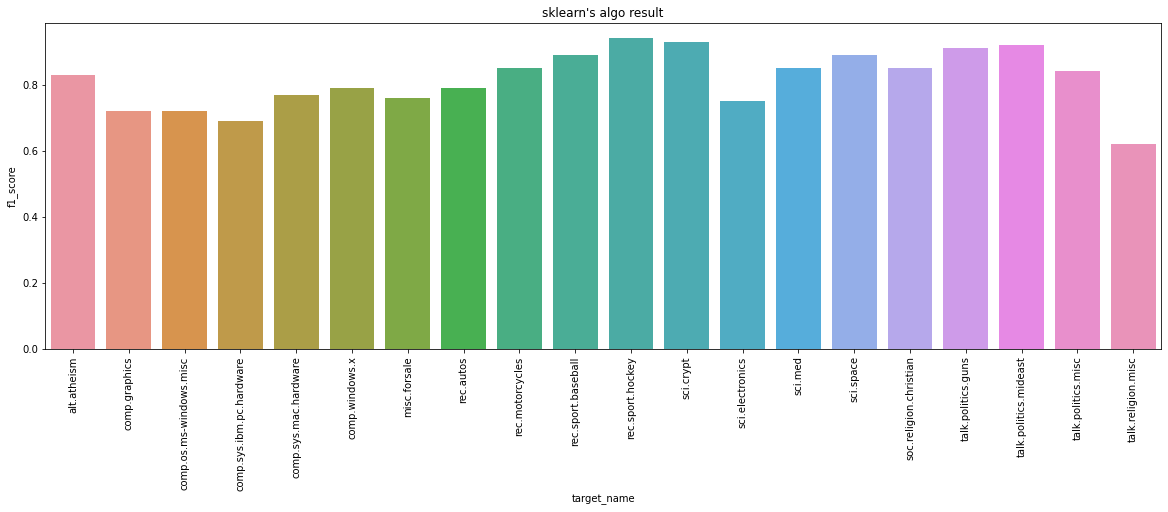

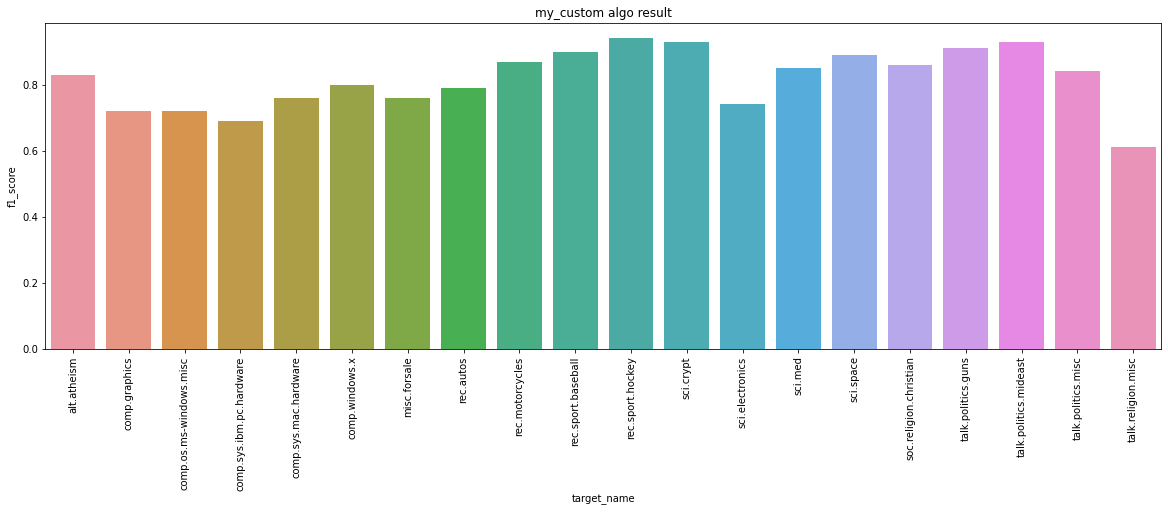

In [65]:
plot_bar(sklearn_result_df,"f1_score","sklearn's algo")
plot_bar(own_result_df,"f1_score","my_custom algo")

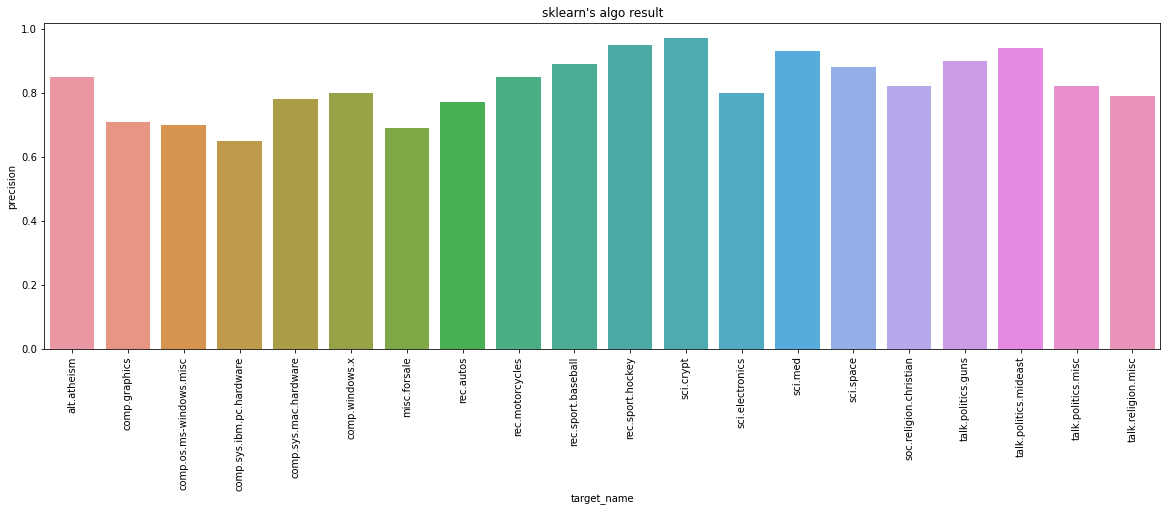

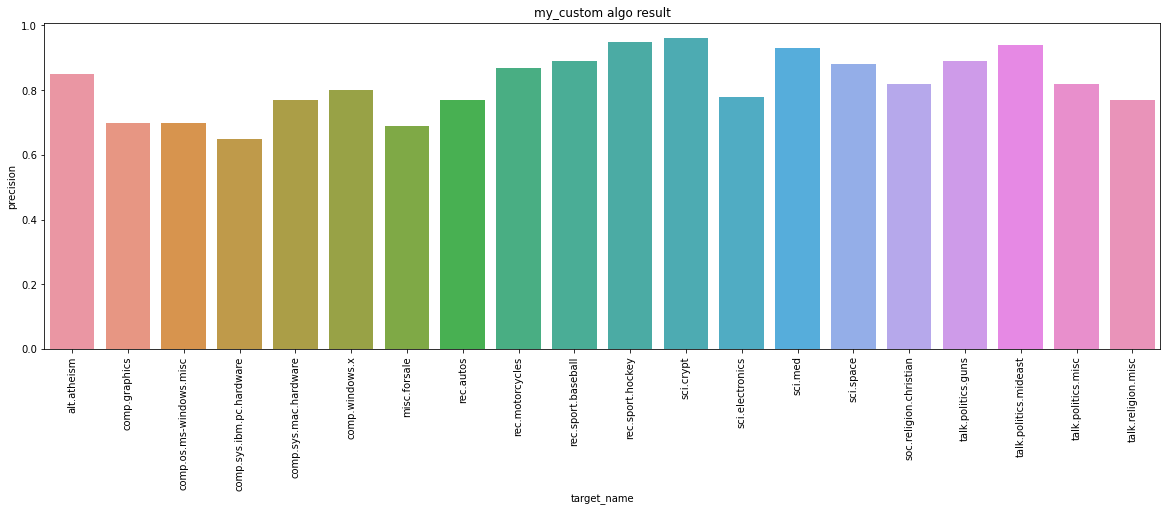

In [66]:
plot_bar(sklearn_result_df,"precision","sklearn's algo")
plot_bar(own_result_df,"precision","my_custom algo")

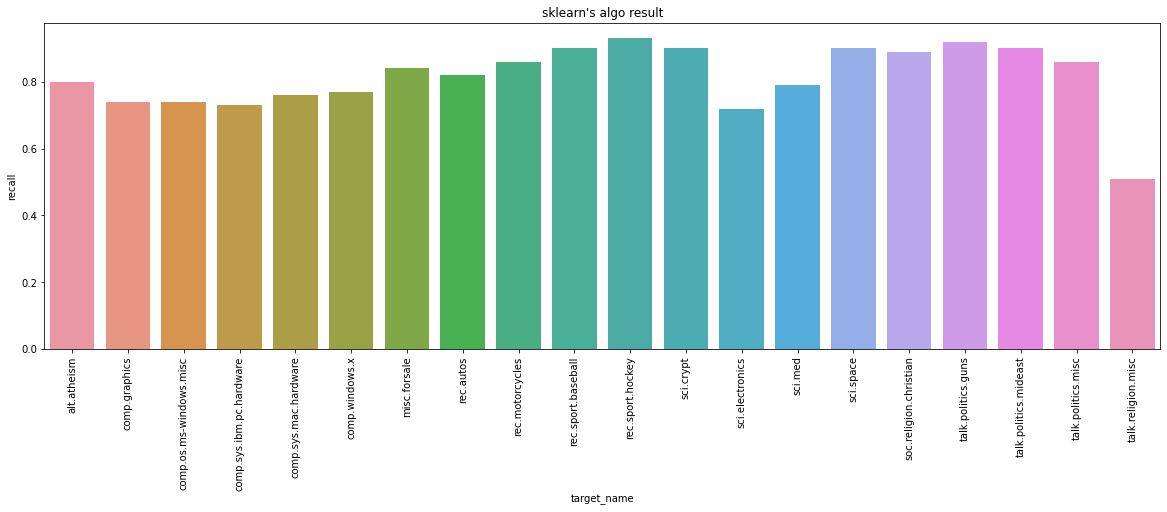

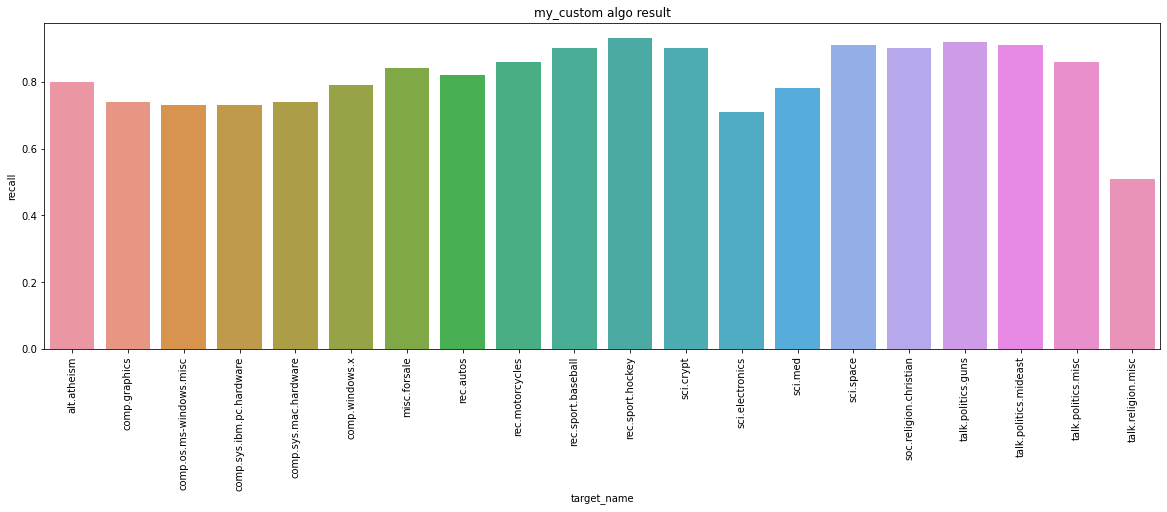

In [67]:
plot_bar(sklearn_result_df,"recall","sklearn's algo")
plot_bar(own_result_df,"recall","my_custom algo")

### End of Project